In [ ]:
'''
Gradient Scaling
    - Gradient scaling involves normalizing the error gradient vector such that vector norm (magnitude) 
      equals a defined value, such as 1.0.
    - Example : we could specify a norm of 1.0, meaning that if the vector norm for a gradient exceeds 1.0
                then the values in the vector will be rescaled so that the norm of the vector equals 1.0
    - Parameter : clipnorm=1.0
'''

'''
Gradient clipping
    - Gradient clipping involves forcing the gradient values (element-wise) to a specific minimum or maximum 
      value if the gradient exceeded an expected range
      
    - Example : we could specify a norm of 0.5.meaning that if a gradient value was less than -0.5, 
                it is set to -0.5 and if it is more than 0.5, then it will be set to 0.5.
    - Parameter : clipvalue=0.5
'''

'''
Clip by Norm : If the l2 norm of the gradient tensor is more than a speciic value,
we normalize the the gradient tensor with below the equation:

gradient = (gradient * clipnorm) / ||gradient||          (L2 Vector Norm)

Clip by value : if the value at any index in the gradient tensor is greater than a specific value or less than the negative 
of the same value, we normalize the the gradient tensor with below the equation

gradient = clip(gradient, -clipvalue, clipvalue)

'''

In [ ]:
'''
How to find Have Exploding Gradients?
    - The model is unable to get traction on your training data (e.g. poor loss).
    - The model is unstable, resulting in large changes in loss from update to update.
    - The model loss goes to NaN during training.
    
'''

In [18]:
# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))


In [19]:
model.get_weights()[0][0] # weights are generated

array([ 0.39217752,  0.30523056,  0.18376356, -0.3822906 ,  0.384376  ,
       -0.14543983,  0.06046438,  0.4527706 , -0.13544285, -0.03536642,
       -0.30004168,  0.15666527,  0.46810246,  0.14033633, -0.3811873 ,
       -0.2786217 , -0.3643281 ,  0.18663383, -0.39621645,  0.06340688,
       -0.11934251, -0.20165947, -0.15366933,  0.4846282 , -0.5345963 ],
      dtype=float32)

Train: nan, Test: nan


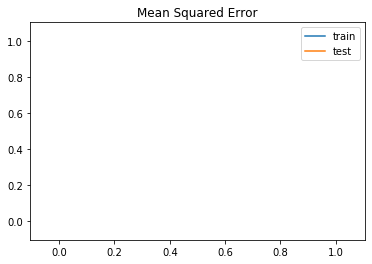

In [20]:
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [21]:
model.get_weights()[0][0] # weights are generated

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

In [ ]:
'''
Understanding the issue :
    - Because of exploding gradient descent You could see the weighta values represented as nan
    - In this case, the model is unable to learn the problem, resulting in predictions of NaN values
    - The model weights exploded during training given the very large errors and in turn error gradients 
      calculated for weight updates.
    - A traditional solution would be to rescale the target variable using either standardization or normalization, 
      and this approach is recommended for MLPs.
    - An alternative that we will investigate in this case will be the use of gradient clipping
''' 

Train: 7.102, Test: 36.021


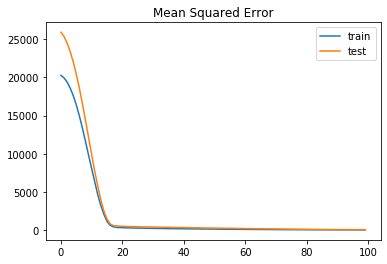

In [23]:
# compile model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model  : With Graidient Norm Scaling
opt = SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [24]:
model.get_weights()[0][0]

array([ 1.1907189 ,  3.1404262 ,  1.2932719 , -1.290873  , -1.7524271 ,
        1.9272594 ,  1.3164591 , -0.89580655,  0.10410634, -1.0345112 ,
       -4.247067  ,  0.90907556,  1.365432  ,  0.98138845,  0.06210076,
        0.8381824 , -2.5176797 ,  0.04678609,  0.1855214 ,  1.2159152 ,
        0.26852077,  1.4789218 ,  2.8440793 ,  0.03849617,  0.9160048 ],
      dtype=float32)

Train: 64.288, Test: 67.713


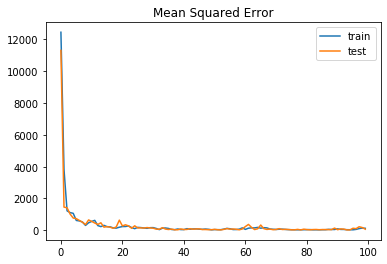

In [25]:
# compile model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model  : With Graidient Value Clipping
opt = SGD(lr=0.01, momentum=0.9, clipvalue=5)
model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
model.get_weights()[0][0]

array([-5.7856601e-01, -2.0004204e+01, -7.5515884e-01,  2.4738031e+01,
       -5.8262014e-01,  1.7847790e+00, -6.6428369e-01,  2.6810962e-01,
        1.5759970e+00,  4.3688947e-01, -1.4619683e+00,  2.3541918e+00,
       -3.9918790e+00,  1.1516600e+01, -1.7941495e+00, -3.0955476e-01,
        1.4295799e+01, -2.8961655e-01, -2.0255311e+00, -4.4966051e-03,
        5.5334264e-01,  4.9965152e-01, -1.2950209e+00,  4.2734823e-01,
       -1.7228868e+00], dtype=float32)